# week 11

A local school district has a goal to reach a 95% graduation rate by the end of the
decade by identifying students who need intervention before they drop out of
school. As a software engineer contacted by the school district, your task is to
model the factors that predict how likely a student is to pass their high school final
exam, by constructing an intervention system that leverages supervised learning
techniques. The board of supervisors has asked that you find the most effective
model that uses the least amount of computation costs to save on the budget. You
will need to analyze the dataset on students' performance and develop a model
that will predict a given student will pass, quantifying whether an intervention is
necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('student-data.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
data.shape

(395, 31)

In [5]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [8]:
data.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,yes
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263,265


In [9]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

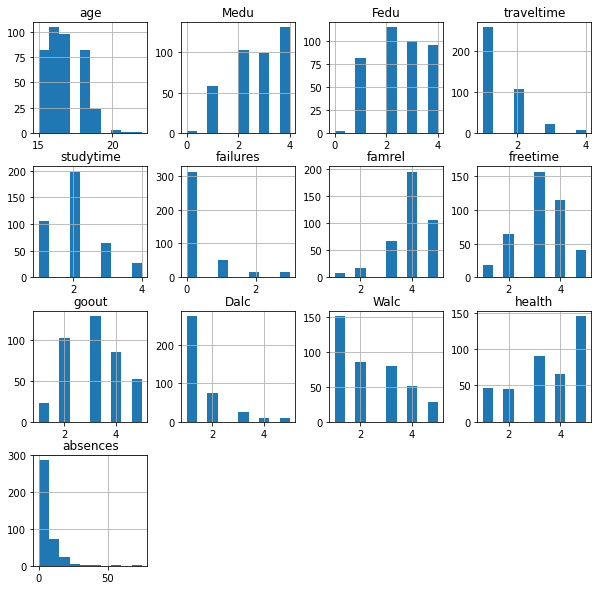

In [10]:
data.hist(figsize=(10, 10))

<AxesSubplot:>

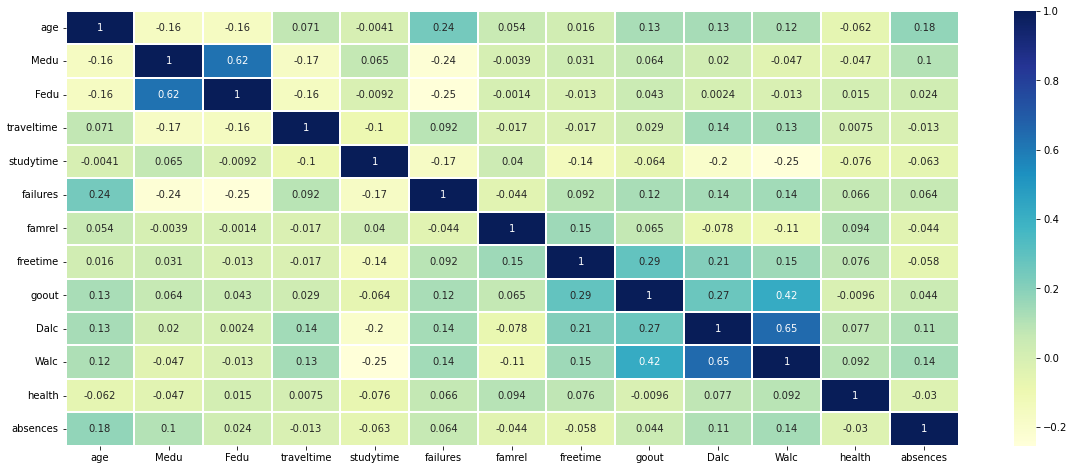

In [11]:
#correlation
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,linewidths=0.2,cmap='YlGnBu')

In [12]:
#data encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [14]:
data['passed'] = label.fit_transform(data['passed'])

In [15]:
dummies = pd.get_dummies(data[['sex','famsize','Pstatus','internet', 'romantic','paid', 'activities', 'nursery','schoolsup', 'famsup','higher']], drop_first=True)

In [16]:
X=data.drop(['school','guardian','Medu', 'Fedu','Mjob', 'Fjob','address','reason','passed'],axis=1)

In [17]:
X = pd.concat([X.drop(['sex','famsize','Pstatus','internet', 'romantic','paid', 'activities', 'nursery','schoolsup', 'famsup','higher'],axis=1), dummies],axis=1)

In [18]:
X['Tot_alcohol_cn']=X[['Dalc','Walc']].sum(axis=1)
X=X.drop(['Dalc','Walc'],axis=1)

In [19]:
X.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,sex_M,...,Pstatus_T,internet_yes,romantic_yes,paid_yes,activities_yes,nursery_yes,schoolsup_yes,famsup_yes,higher_yes,Tot_alcohol_cn
0,18,2,2,0,4,3,4,3,6,0,...,0,0,0,0,0,1,1,0,1,2
1,17,1,2,0,5,3,3,3,4,0,...,1,1,0,0,0,0,0,1,1,2
2,15,1,2,3,4,3,2,3,10,0,...,1,1,0,1,0,1,1,0,1,5
3,15,1,3,0,3,2,2,5,2,0,...,1,1,1,1,1,1,0,1,1,2
4,16,1,2,0,4,3,2,5,4,0,...,1,0,0,1,0,1,0,1,1,3


In [20]:
X.dtypes

age               int64
traveltime        int64
studytime         int64
failures          int64
famrel            int64
freetime          int64
goout             int64
health            int64
absences          int64
sex_M             uint8
famsize_LE3       uint8
Pstatus_T         uint8
internet_yes      uint8
romantic_yes      uint8
paid_yes          uint8
activities_yes    uint8
nursery_yes       uint8
schoolsup_yes     uint8
famsup_yes        uint8
higher_yes        uint8
Tot_alcohol_cn    int64
dtype: object

### splitting the dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
y=data['passed']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [23]:
X_train.shape

(316, 21)

In [24]:
X_test.shape

(79, 21)

In [25]:
y_train.shape

(316,)

In [26]:
y_test.shape

(79,)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Building the Models 

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
predictions= log_model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [31]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
print('Precision is: ',precision_score(y_test,predictions))
print('Recall is: ',recall_score(y_test,predictions))
print('fl score is: ',f1_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.7468354430379747
Precision is:  0.7580645161290323
Recall is:  0.9038461538461539
fl score is:  0.8245614035087719


array([[12, 15],
       [ 5, 47]], dtype=int64)

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [34]:
print("accuracy_score ", accuracy_score(y_pred,y_test) )
print("precision_score ", precision_score(y_pred,y_test) )
print("recall_score ",recall_score(y_pred,y_test) )
print('F1 score',f1_score(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

accuracy_score  0.6962025316455697
precision_score  0.9038461538461539
recall_score  0.7121212121212122
F1 score 0.7966101694915254
[[ 8  5]
 [19 47]]


In [35]:
#feature importance

<AxesSubplot:>

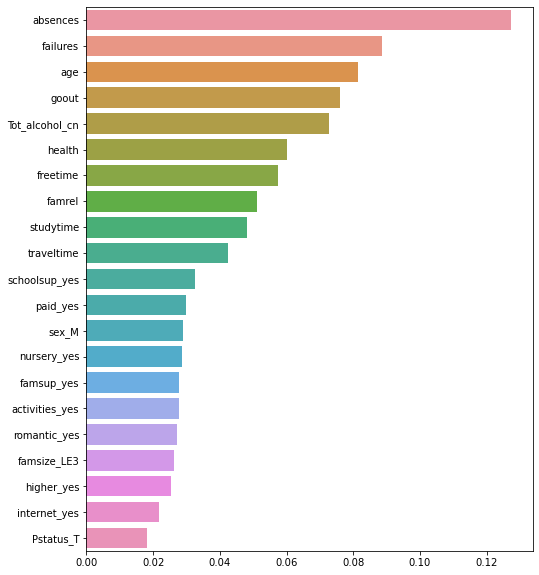

In [36]:
imp=pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x=imp,y=imp.index)

### Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)
predictions= dtmodel.predict(X_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))
print('fl score is: ',f1_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.6962025316455697
fl score is:  0.7777777777777779


array([[13, 14],
       [10, 42]], dtype=int64)

### KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors=np.arange(3,15)
for K in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=K,metric='minkowski')
    classifier.fit(X_train,y_train)
    predictions= classifier.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    acc_values.append(acc)

In [39]:
acc_values

[0.6455696202531646,
 0.5822784810126582,
 0.6708860759493671,
 0.6582278481012658,
 0.6835443037974683,
 0.7088607594936709,
 0.6962025316455697,
 0.6835443037974683,
 0.6708860759493671,
 0.6582278481012658,
 0.6835443037974683,
 0.6582278481012658]

Text(0, 0.5, 'accuracy')

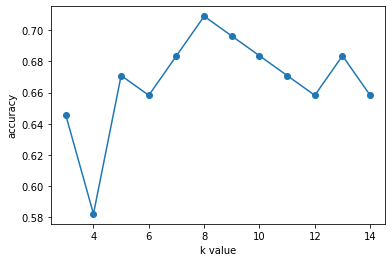

In [40]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [41]:
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(X_train,y_train)
predictions= classifier.predict(X_test)

In [42]:
print('Accuracy is: ',accuracy_score(y_test,predictions))
print('Precision is: ',precision_score(y_test,predictions))
print('Recall is: ',recall_score(y_test,predictions))
print('fl score is: ',f1_score(y_test,predictions))
confusion_matrix(y_test,predictions)

Accuracy is:  0.6835443037974683
Precision is:  0.6901408450704225
Recall is:  0.9423076923076923
fl score is:  0.7967479674796748


array([[ 5, 22],
       [ 3, 49]], dtype=int64)

The accuracy and f1 score given by logistic regression model is 0.74 and 0.82. So we can go with this model. 